In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [87]:
def show_img(array: np.ndarray):
    plt.axis('off')
    plt.imshow(array)
    plt.show()

In [2]:
array = np.array(range(45)).reshape((3,5,3))
print(array.shape)
print(array)
# print(array[:, 0, :])
# print(array[0, :])


(3, 5, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]

 [[30 31 32]
  [33 34 35]
  [36 37 38]
  [39 40 41]
  [42 43 44]]]


width=1082 height=670


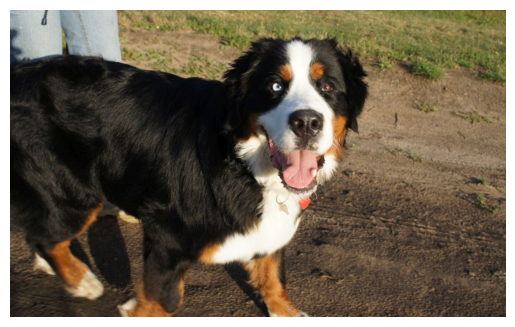

In [62]:
cv_img = cv.imread('pies.jpeg')
cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)

height, width, *_ = cv_img.shape
print(f'{width=} {height=}')
# w - h / 2

plt.axis('off')
plt.imshow(cv_img)
plt.show()

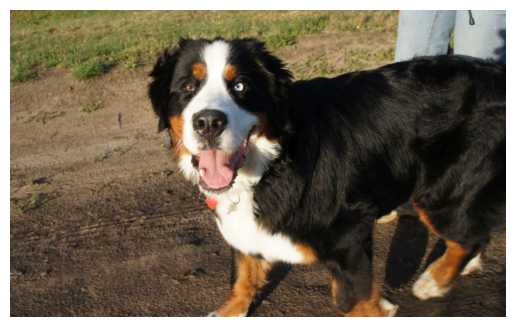

In [49]:
# odbicie lustrzane w pionie
def odbicie_lustrzane_pion(array: np.ndarray) -> np.ndarray:
    return array[:, ::-1]

img = odbicie_lustrzane_pion(cv_img)

plt.axis('off')
plt.imshow(img)
plt.show()

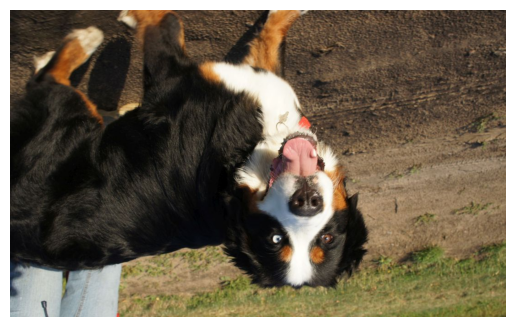

In [50]:
# odbicie lustrzane w poziomie

def odbicie_lustrzane_poziom(array: np.ndarray) -> np.ndarray:
    return array[::-1, :]

img = odbicie_lustrzane_poziom(cv_img)

plt.axis('off')
plt.imshow(img)
plt.show()

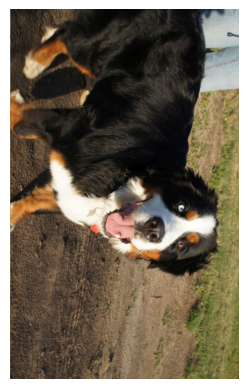

In [69]:
# 90 stopni w prawo

def rotate_clockwise_90(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape
    result = np.zeros((width, height, channels), dtype=int)
    height, width = width, height
    for row in range(width):
        for column in range(height):
            result[column, row] = np.copy(array[-row, column])

    return result

# height, width, channels = cv_img.shape
# print(f'original {width=} {height=}')

# img = np.zeros((width, height, channels), dtype=int)
# height, width, channels = img.shape
# print(f'rotated {width=} {height=}')

# for row in range(width):
#     for column in range(height):
#         img[column, row] = np.copy(cv_img[-row, column])

img = rotate_clockwise_90(cv_img)
plt.axis('off')
plt.imshow(img)
plt.show()

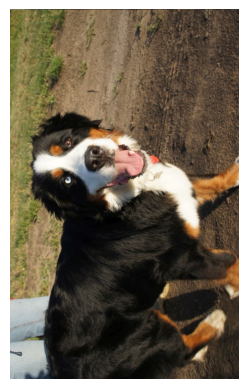

In [66]:
# 90 stopni w lewo

def rotate_anticlockwise_90(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape
    result = np.zeros((width, height, channels), dtype=int)
    height, width = width, height
    for row in range(width):
        for column in range(height):
            result[column, row] = np.copy(array[row, -column])

    return result

img = rotate_anticlockwise_90(cv_img)

plt.axis('off')
plt.imshow(img)
plt.show()

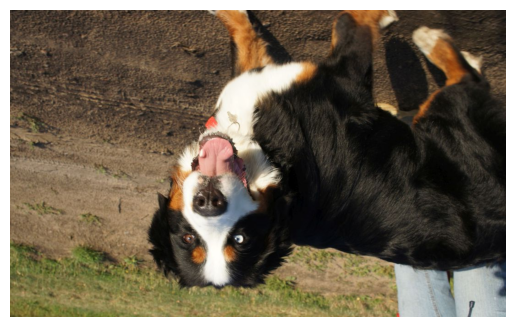

In [67]:
# 180 stopni
def rotate_clockwise_180(array: np.ndarray) -> np.ndarray:
    array = array[::-1, :]
    return array[:, ::-1]

img = rotate_clockwise_180(cv_img)
plt.axis('off')
plt.imshow(img)
plt.show()


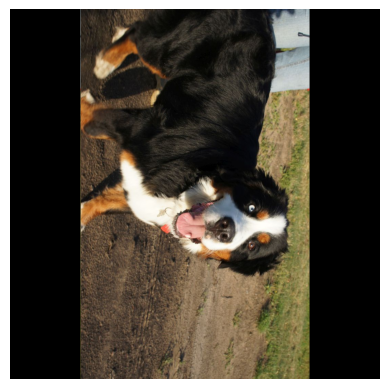

In [78]:

def expand_to_square(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape

    if height > width:
        result = np.zeros(shape=(height, height, channels), dtype=int)
        offset = (height - width) // 2
        for row in range(width):
            for column in range(height):
                result[column, row + offset] = np.copy(array[column, row])
        return result
    else:
        return array

img = rotate_clockwise_90(cv_img)
img = expand_to_square(img)

plt.axis('off')
plt.imshow(img)
plt.show()


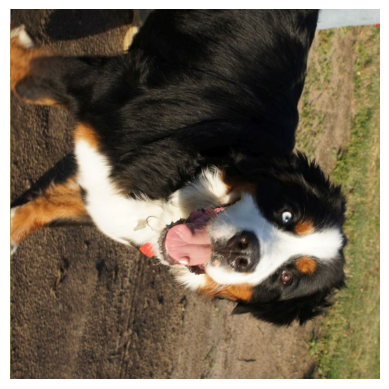

In [80]:
def cut_square(array: np.ndarray) -> np.ndarray:
    height, width, channels = array.shape

    if height > width:
        result = np.zeros(shape=(width, width, channels), dtype=int)
        offset = (height - width) // 2
        for row in range(width):
            for column in range(width):
                result[column, row] = np.copy(array[column + offset, row])
        return result
    else:
        return array

img = rotate_clockwise_90(cv_img)
img = cut_square(img)

plt.axis('off')
plt.imshow(img)
plt.show()

(512, 512, 3)


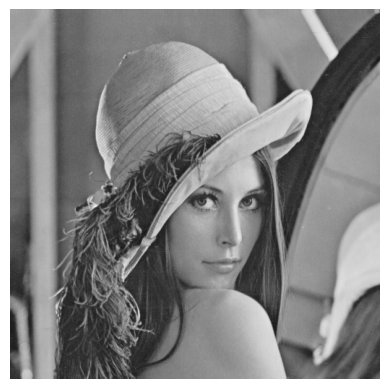

In [89]:
cv_lenna = cv.imread('Lenna.png')
cv_lenna = cv.cvtColor(cv_lenna, cv.COLOR_BGR2GRAY)
cv_lenna = cv.cvtColor(cv_lenna, cv.COLOR_BGR2RGB)
print(cv_lenna.shape)

plt.axis('off')
plt.imshow(cv_lenna)
plt.show()

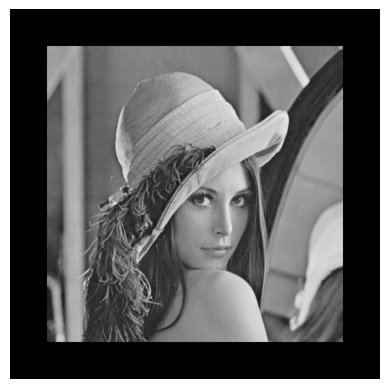

In [114]:
result_img = np.zeros(shape=(640, 640, 3), dtype=int)
second_img = cv_lenna

if result_img.shape >= second_img.shape:
    height, width, channels = second_img.shape
    height_offset = (result_img.shape[0] - second_img.shape[0]) // 2
    width_offset = (result_img.shape[1] - second_img.shape[1]) // 2

    for row in range(width):
        for column in range(height):
            result_img[column + height_offset, row + width_offset] = np.copy(second_img[column, row])
else:
    print('First must be bigger than second to fit')

show_img(result_img)